In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import IPython
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
%matplotlib inline

In [25]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
df_train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Heininen, Miss. Wendla Maria",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [30]:
total = df_train.isnull().sum()
Percent = round(df_train.isnull().sum()/df_train.shape[0],3) *100
pd.concat([total,Percent],axis = 1,keys = ['total','Percent'])

,total,Percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,19.9
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


In [31]:
total_test = df_test.isnull().sum()
Percent_test = round(df_test.isnull().sum()/df_test.shape[0],3) * 100
pd.concat([total_test,Percent_test],axis = 1,keys = ['total_test','Percent_test'])

,total_test,Percent_test
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,86,20.6
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,1,0.2
Cabin,327,78.2


In [32]:
data_clean = [df_train,df_test]

In [33]:
for dataset in data_clean:
    dataset.Age.fillna(dataset.Age.median(),inplace = True)
    dataset.Embarked.fillna(dataset.Embarked.mode()[0],inplace = True)
    dataset.Fare.fillna(dataset.Fare.median(),inplace = True)

In [34]:
print('df_train error value: \n',df_train.isnull().sum())
print('_ '*20)
print('df_test error value: \n ',df_test.isnull().sum())

df_train error value: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
df_test error value: 
  PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [35]:
drop_col = ['PassengerId','Cabin','Ticket']
df_train.drop(drop_col,axis = 1,inplace = True)
for dataset in data_clean:
    dataset['Title'] = dataset['Name'].str.split(",",expand = True)[1].str.split('.',expand = True)[0]
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int),5)

k = 10
state = (df_train['Title'].value_counts() < 10)
df_train['Title'] = df_train['Title'].apply(lambda x : 'Msic' if state[x] == True else x)

df_train['Title'].value_counts()
print('_ '*20)
df_train.info()
df_test.info()
df_train.sample(10)

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
Title         891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
54,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,C,Mr,2,0,"(31.0, 512.329]","(64.0, 80.0]"
324,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,69.5500,S,Mr,11,0,"(31.0, 512.329]","(16.0, 32.0]"
261,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,31.3875,S,Master,7,0,"(31.0, 512.329]","(-0.08, 16.0]"
297,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,151.5500,S,Miss,4,0,"(31.0, 512.329]","(-0.08, 16.0]"
517,0,3,"Ryan, Mr. Patrick",male,28.0,0,0,24.1500,Q,Mr,1,1,"(14.454, 31.0]","(16.0, 32.0]"
288,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,13.0000,S,Mr,1,1,"(7.91, 14.454]","(32.0, 48.0]"
586,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,15.0000,S,Mr,1,1,"(14.454, 31.0]","(32.0, 48.0]"
839,1,1,"Marechal, Mr. Pierre",male,28.0,0,0,29.7000,C,Mr,1,1,"(14.454, 31.0]","(16.0, 32.0]"
326,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,6.2375,S,Mr,1,1,"(-0.001, 7.91]","(48.0, 64.0]"
704,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,Mr,2,0,"(-0.001, 7.91]","(16.0, 32.0]"


In [36]:
label = LabelEncoder()
for dataset in data_clean:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [37]:
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 
data1_dummy = pd.get_dummies(df_train[data1_x])

In [38]:
for x in data1_x:
    if df_train[x].dtype != 'float64':
        print('Survived correction:',x)
        print(df_train[[x,'Survived']].groupby(x,as_index = False).mean())

Survived correction: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
Survived correction: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Survived correction: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
Survived correction: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Msic  0.444444
Survived correction: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Survived correction: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
Survived correction: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5     

In [40]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,2,1


In [41]:
df_train[data1_x].head()

,Sex,Pclass,Embarked,Title,SibSp,Parch,Age,Fare,FamilySize,IsAlone
0,male,3,S,Mr,1,0,22.0,7.2500,2,0
1,female,1,C,Mrs,1,0,38.0,71.2833,2,0
2,female,3,S,Miss,0,0,26.0,7.9250,1,1
3,female,1,S,Mrs,1,0,35.0,53.1000,2,0
4,male,3,S,Mr,0,0,35.0,8.0500,1,1


In [42]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Msic
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


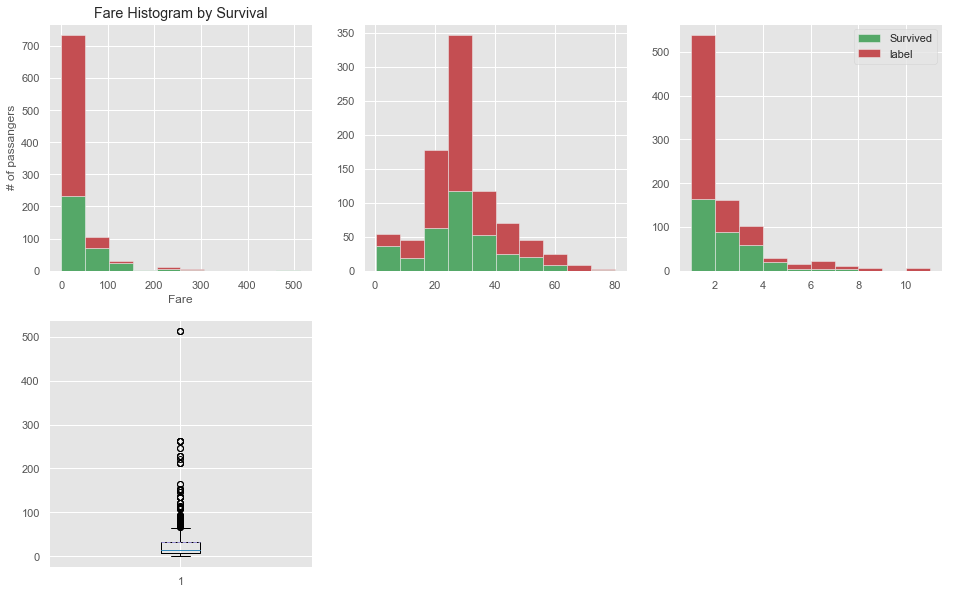

In [132]:
data1 = df_train.copy()
plt.figure(figsize = [16,10])

plt.subplot(231)
plt.hist(x = [data1['Fare'][data1['Survived']==1],data1['Fare'][data1['Survived']==0]],
         stacked = True,color = ['g','r'])
plt.xlabel('Fare')
plt.ylabel('# of passangers')
plt.title('Fare Histogram by Survival')

plt.subplot(232)
plt.hist(x = [data1['Age'][data1['Survived']==1],data1['Age'][data1['Survived']==0]],
              stacked = True,color = ['g','r'],label = ['Survived',''])

plt.subplot(233)
plt.hist(x = [data1['FamilySize'][data1['Survived']==1],data1['FamilySize'][data1['Survived']==0]],stacked = True,
        label = ['Survived','label'],color = ['g','r'])
plt.legend()

plt.subplot(234)
plt.boxplot(data1.Fare,showmeans = True,meanline = True)

plt.show()

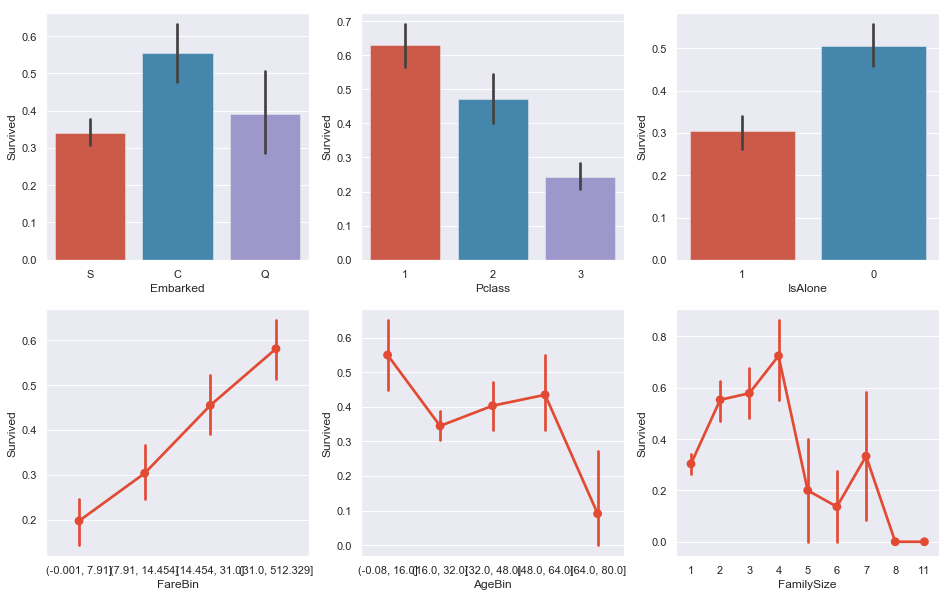

In [103]:
fig ,axis = plt.subplots(2,3,figsize = (16,10))
plt.style.use('ggplot')
sns.barplot(data = data1,x = 'Embarked',y = 'Survived',ax = axis[0,0])
sns.barplot(data = data1,x = 'Pclass',y = 'Survived',ax = axis[0,1])
sns.barplot(data = data1,x = 'IsAlone', y = 'Survived',ax = axis[0,2],order=[1,0])

sns.pointplot(x = data1.FareBin,y = data1.Survived,ax = axis[1,0])
sns.pointplot(x = data1.AgeBin,y = data1.Survived,ax = axis[1,1])
sns.pointplot(x = data1.FamilySize, y =data1.Survived,ax = axis[1,2])

plt.show()

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

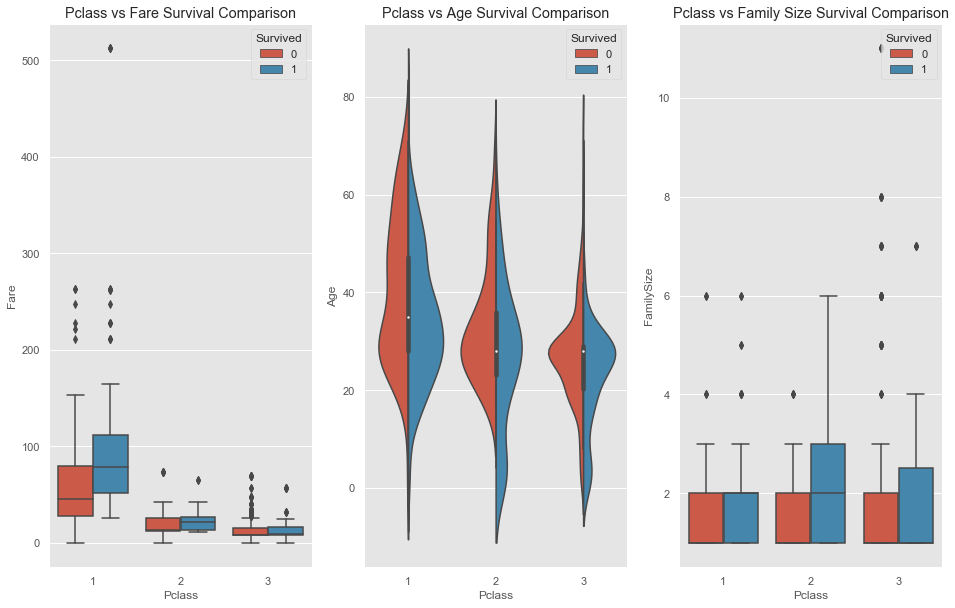

In [122]:
fig,(axis1,axis2,axis3) = plt.subplots(1,3,figsize = (16,10))

sns.boxplot(x = 'Pclass',y = 'Fare',hue = 'Survived',data = data1,ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age',hue = 'Survived',data = data1,ax = axis2,split = True)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass',y = 'FamilySize',hue = 'Survived',data = data1,ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

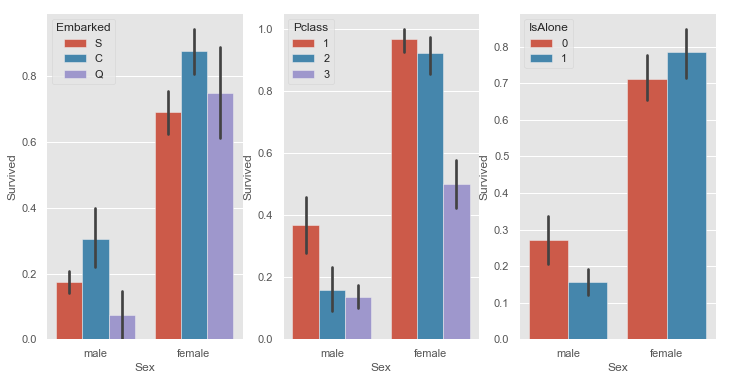

In [140]:
fig,qaxis = plt.subplots(1,3,figsize=(12,6))

sns.barplot( x = data1['Sex'],y = data1['Survived'],hue = data1['Embarked'],ax = qaxis[0])
sns.barplot(data = data1,x = 'Sex',y = 'Survived',hue = 'Pclass',ax = qaxis[1])
sns.barplot(data = data1, x= 'Sex',y = 'Survived',hue = 'IsAlone',ax = qaxis[2])

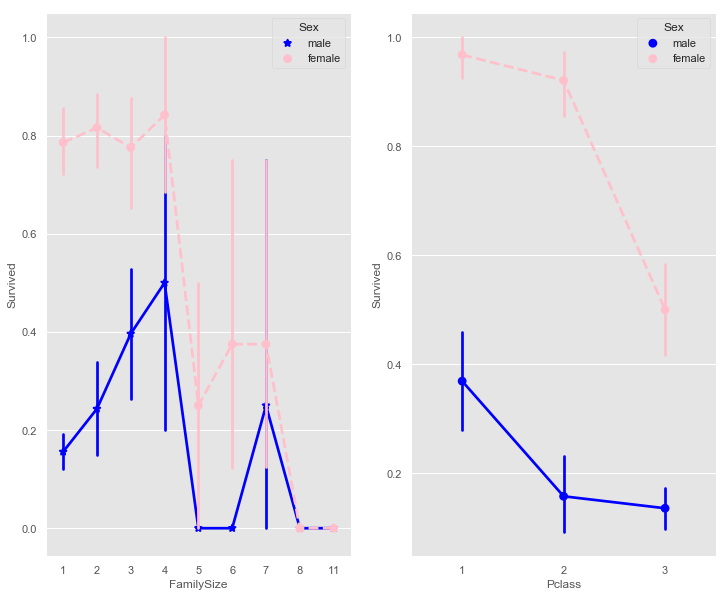

In [154]:
fig,eaxis =  plt.subplots(1,2,figsize=(12,10))

sns.pointplot(data = data1,x = 'FamilySize',y = 'Survived',hue = 'Sex',
             palette = {'male':'blue','female':'pink'},
             markers = ['*','o'],linestyles = ['-','--'],ax = eaxis[0])
sns.pointplot(data = data1,x = 'Pclass',y = 'Survived',hue = 'Sex',
            palette = {'male':'blue','female':'pink'},markes = ['*','p'],linestyles = ['-','--'],
            ax = eaxis[1])

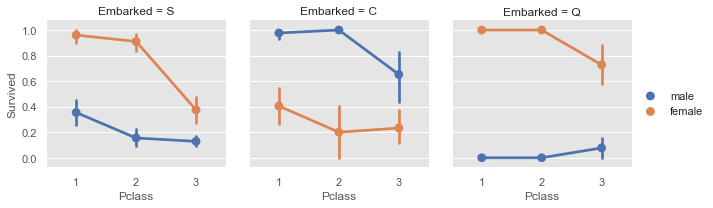

In [161]:
e = sns.FacetGrid(data1,col ='Embarked')
e.map(sns.pointplot,'Pclass','Survived','Sex',ci = 95.0,palette = 'deep')
e.add_legend()

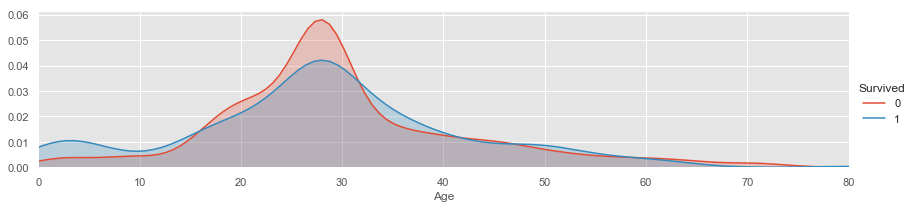

In [179]:
a = sns.FacetGrid( data1,hue = 'Survived', aspect = 4)
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

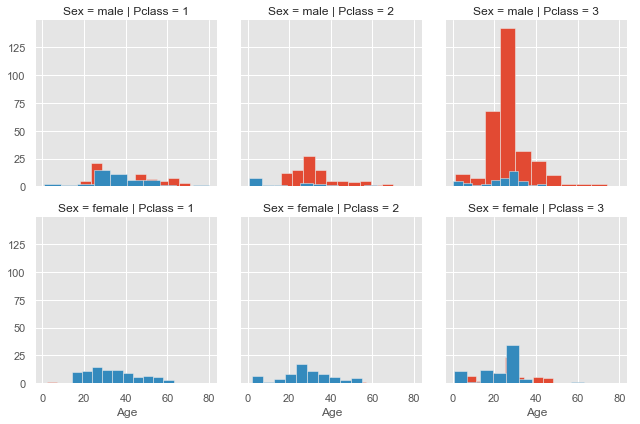

In [185]:
b = sns.FacetGrid(data1,col = 'Pclass',row = 'Sex',hue = 'Survived')
b.map(plt.hist,'Age')

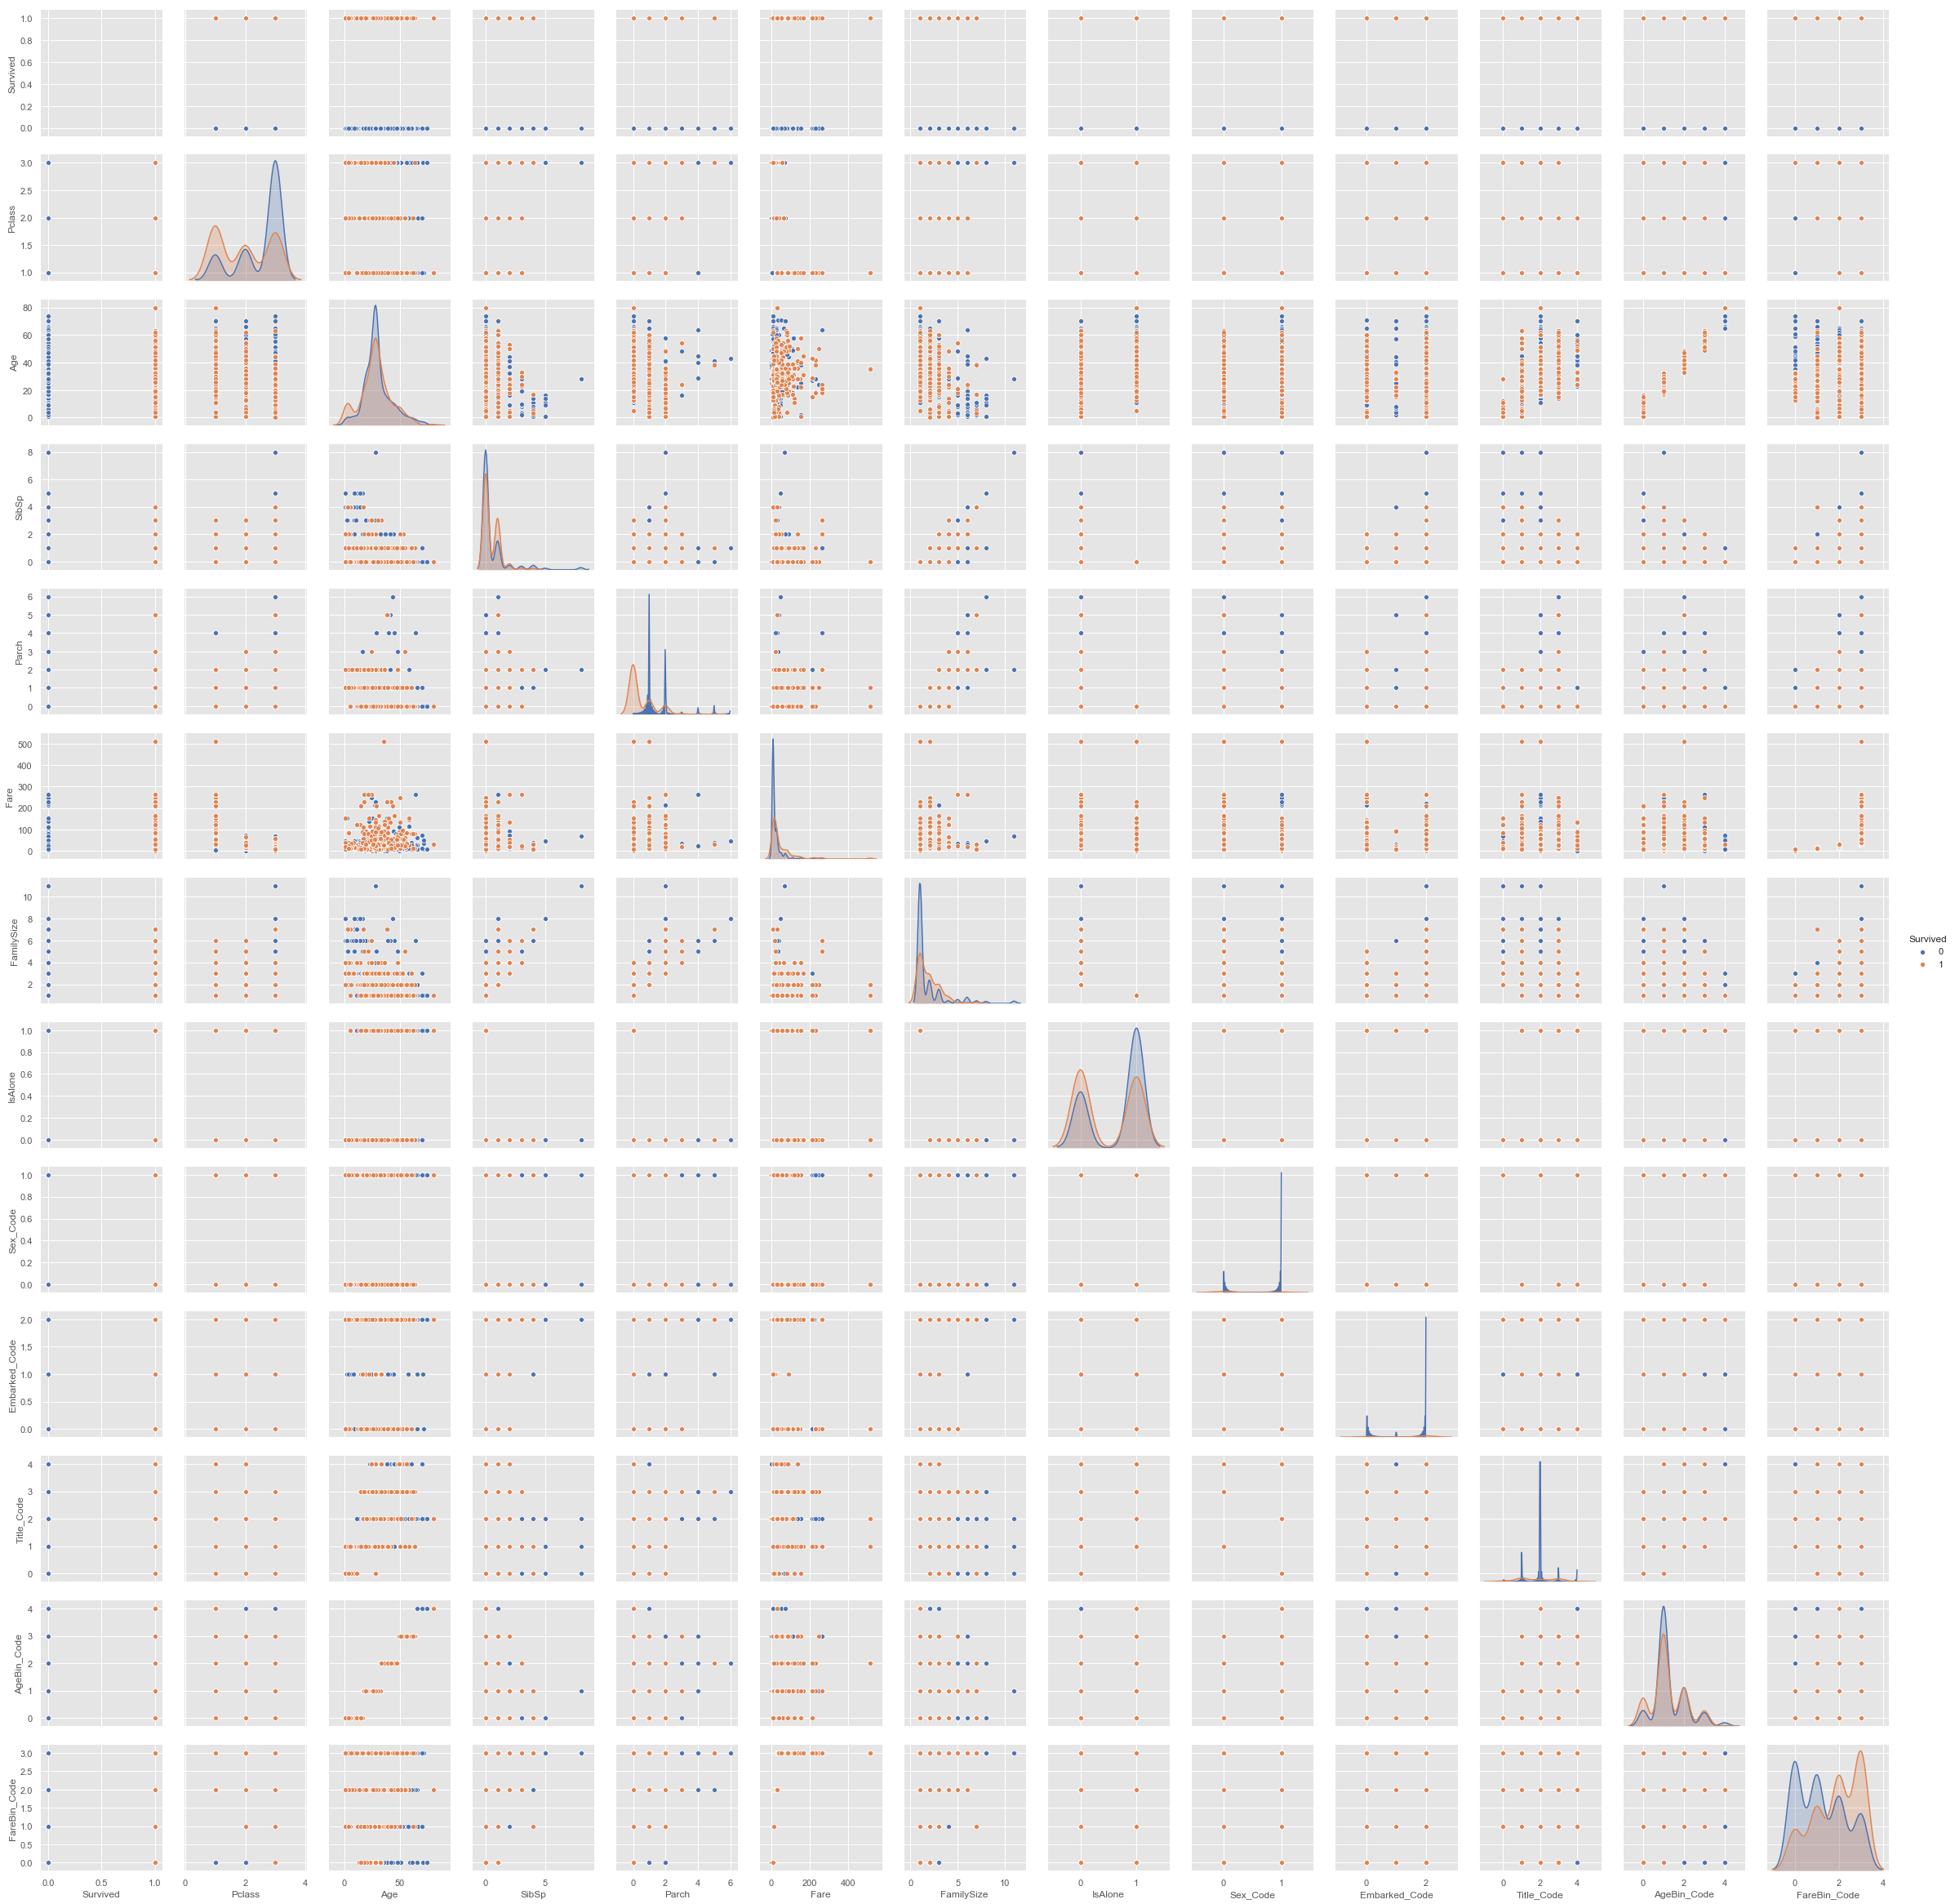

In [189]:
d = sns.pairplot(df_train,hue =  'Survived',diag_kind = 'kde',palette = 'deep')

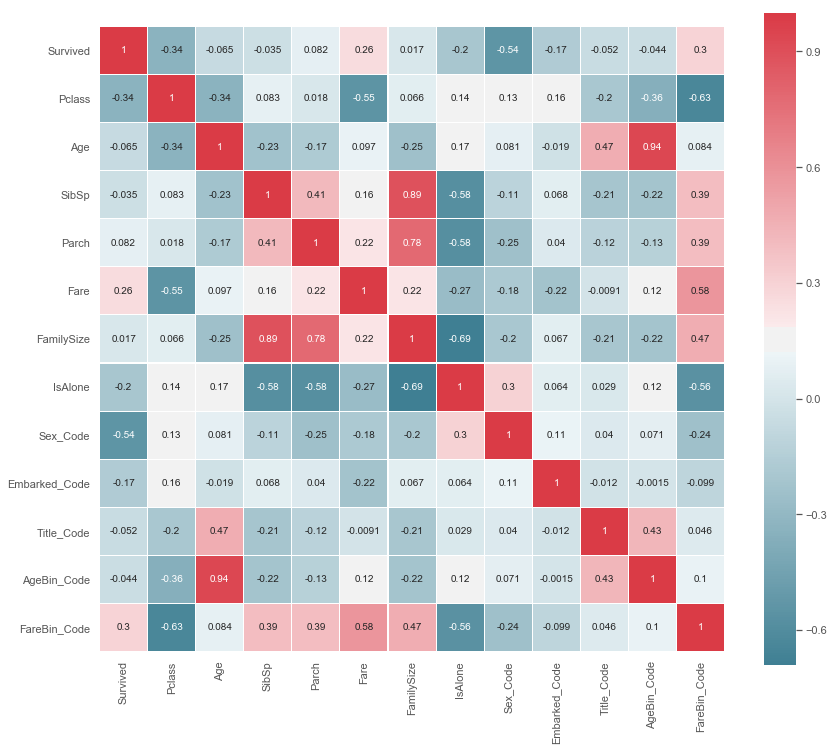

In [209]:
plt.figure(figsize = (14,12))
color = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(df_train.corr(),square = True,annot = True,vmax = 1,
           linewidths = 0.1,linecolor = 'white',cmap = color )

In [62]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,2,0,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1,1,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,2,0,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,1,1,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,2,1
